# House Price Prediction

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
houses_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## Data Preprocessing

In [115]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [116]:
houses_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

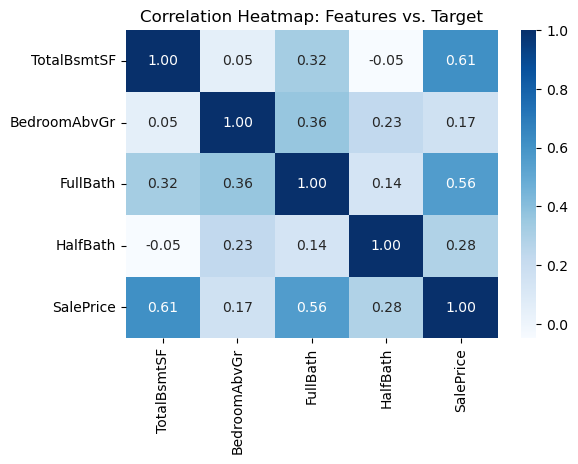

In [117]:
data_subset = houses_data[['TotalBsmtSF', 'BedroomAbvGr', 'FullBath', 'HalfBath','SalePrice']]
correlation_matrix = data_subset.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap: Features vs. Target")
plt.show()


In [118]:
# Split the data into training and testing sets
X = houses_data[['TotalBsmtSF', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y = houses_data[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Tranning and Evualization

In [119]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [120]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2736702293.13
R-squared: 0.64


In [131]:
test_data = test_data[['TotalBsmtSF', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
model.predict(test_data)

array([[123566.40552387],
       [198299.60980253],
       [217616.92465642],
       ...,
       [142809.96270345],
       [120974.74467056],
       [223507.09403324]])